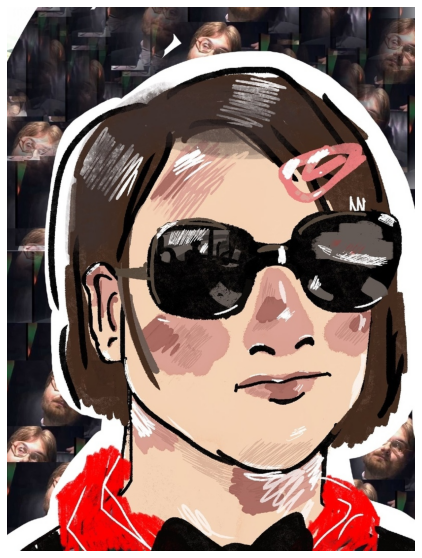

In [1]:
# Применить 5 фильтров к своей фотографии 
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
plt.rcParams['figure.figsize'] = [18, 10]
path = 'portret.jpg'
img = plt.imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()
# оригинал 

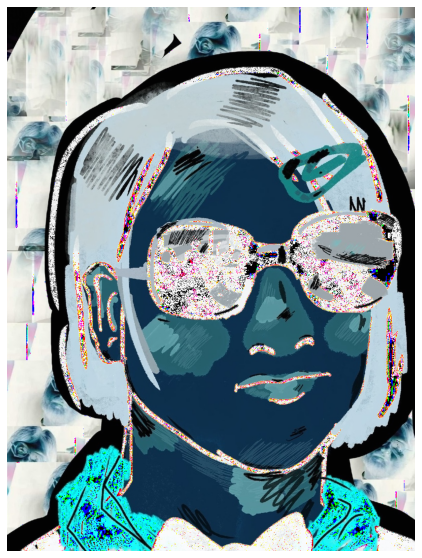

In [2]:
img = plt.imread(path)
img = 1 - img
plt.imshow(img)
plt.axis('off')
plt.show()
# негатив 

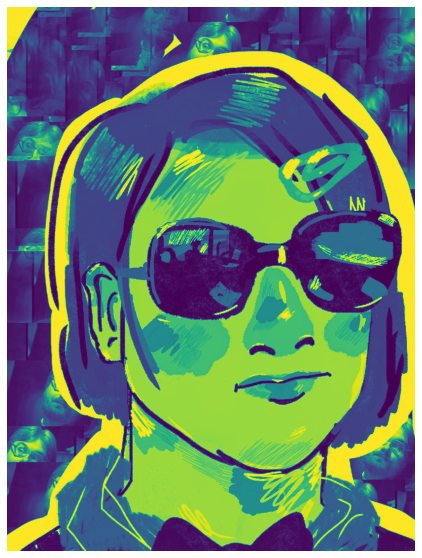

In [3]:
import numpy as np
img = Image.open(path).convert('L')
data = np.array(img)
plt.imshow(img)
plt.axis('off')
plt.show()

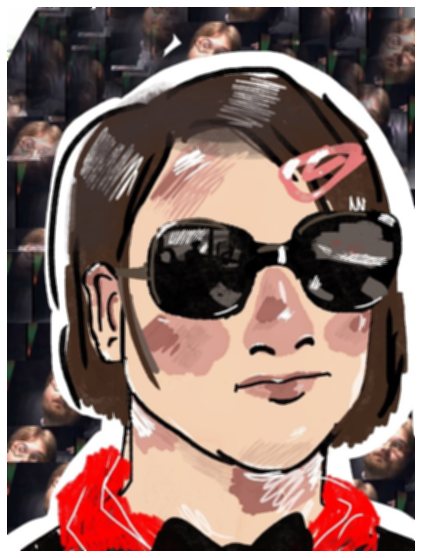

In [4]:
img = Image.open(path)
filter1 = img.filter(ImageFilter.BLUR) 
plt.imshow(filter1)
plt.axis('off')
plt.show()
# тут может не очень видно, но это размытие 

(-0.5, 809.5, 1079.5, -0.5)

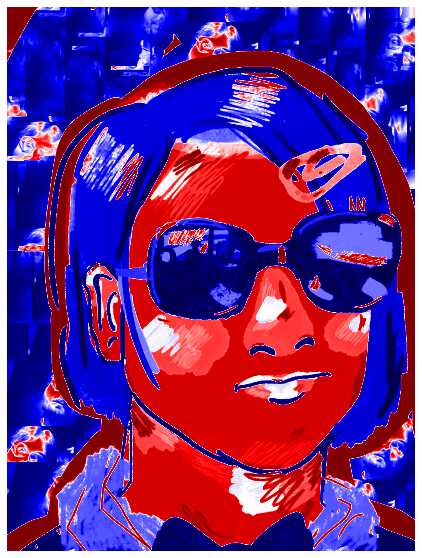

In [5]:
img = plt.imread(path)
plt.imshow(img.mean(2), cmap="seismic") 
plt.axis('off')

In [6]:
def convolve(img, kernel):
    modified = np.zeros_like(img)
    for row in range(1, img.shape[0] - 2):
        for col in range(1, img.shape[1] - 2):
            modified[row, col] = (img[row:row + 3, col:col + 3] * kernel).mean()
    return modified

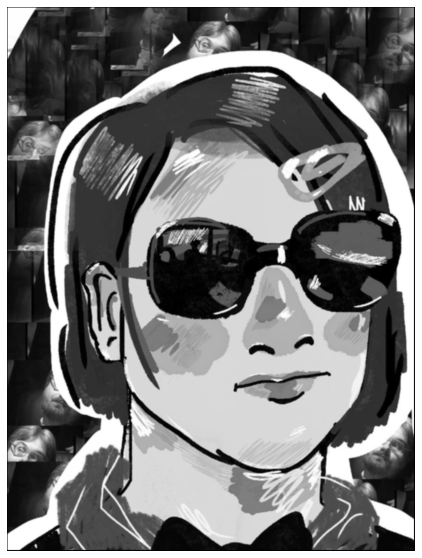

In [72]:
kernel = np.ones((3, 3))
modified = convolve(data, kernel)
plt.imshow(modified, cmap='gray')
plt.axis('off')
plt.show()

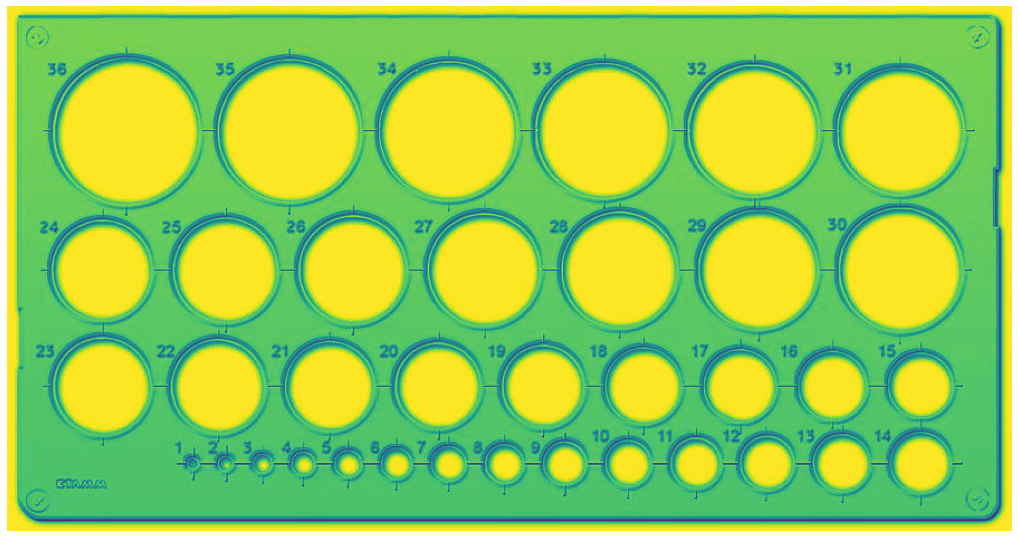

In [7]:
# Поиск кружков на фотографии по коду из документации cv2 
import cv2
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = [18, 10]

path_2 = 'circles.jpg'
img = cv2.imread(path_2, 0)
plt.axis('off')
plt.imshow(img)

In [8]:
img = cv2.medianBlur(img, 5)
plt.axis('off')
plt.imshow(img)

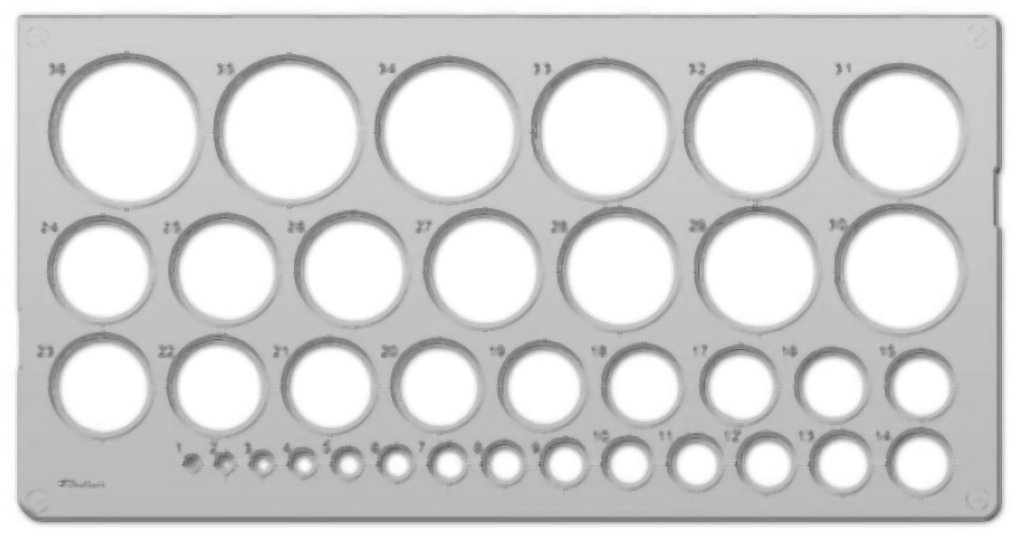

In [9]:
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
plt.axis('off')
plt.imshow(cimg)

In [10]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=17,maxRadius=55)
circles = np.uint16(np.around(circles))

In [11]:
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2) # рисование окружности 

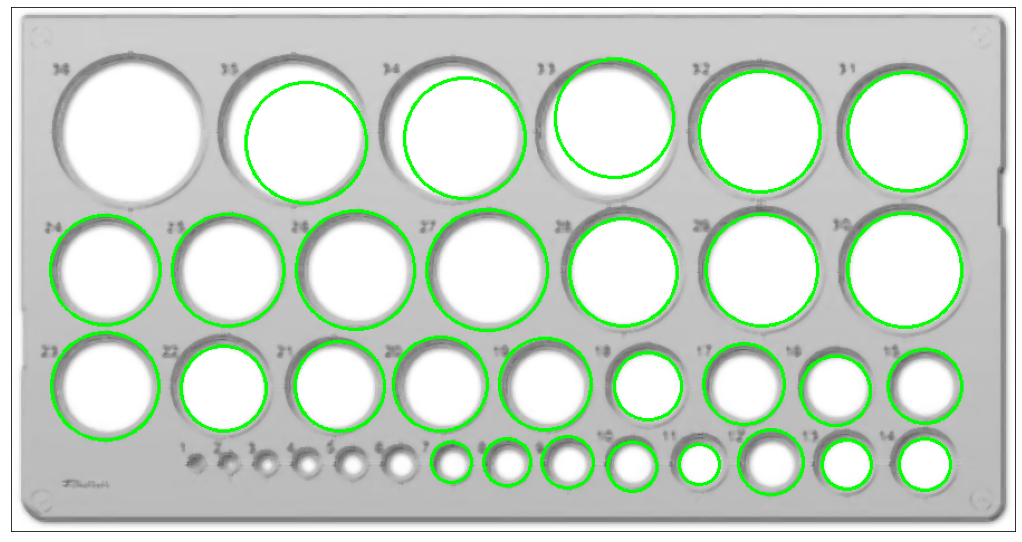

In [12]:
plt.imshow(cimg)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()